In [1]:
!pip install numpy

zsh:1: command not found: pip


In [11]:
!pip3 install geos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 927.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 393.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 464.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 127.2 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [3]:
!pip3 install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 352.4 kB/s eta 0:00:0000:0100:03

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [13]:
!pip3 install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [8]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 136.9 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 476.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 133.5 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 625.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 321.7 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


Converged after 16556 iterations.


<Figure size 1000x700 with 0 Axes>

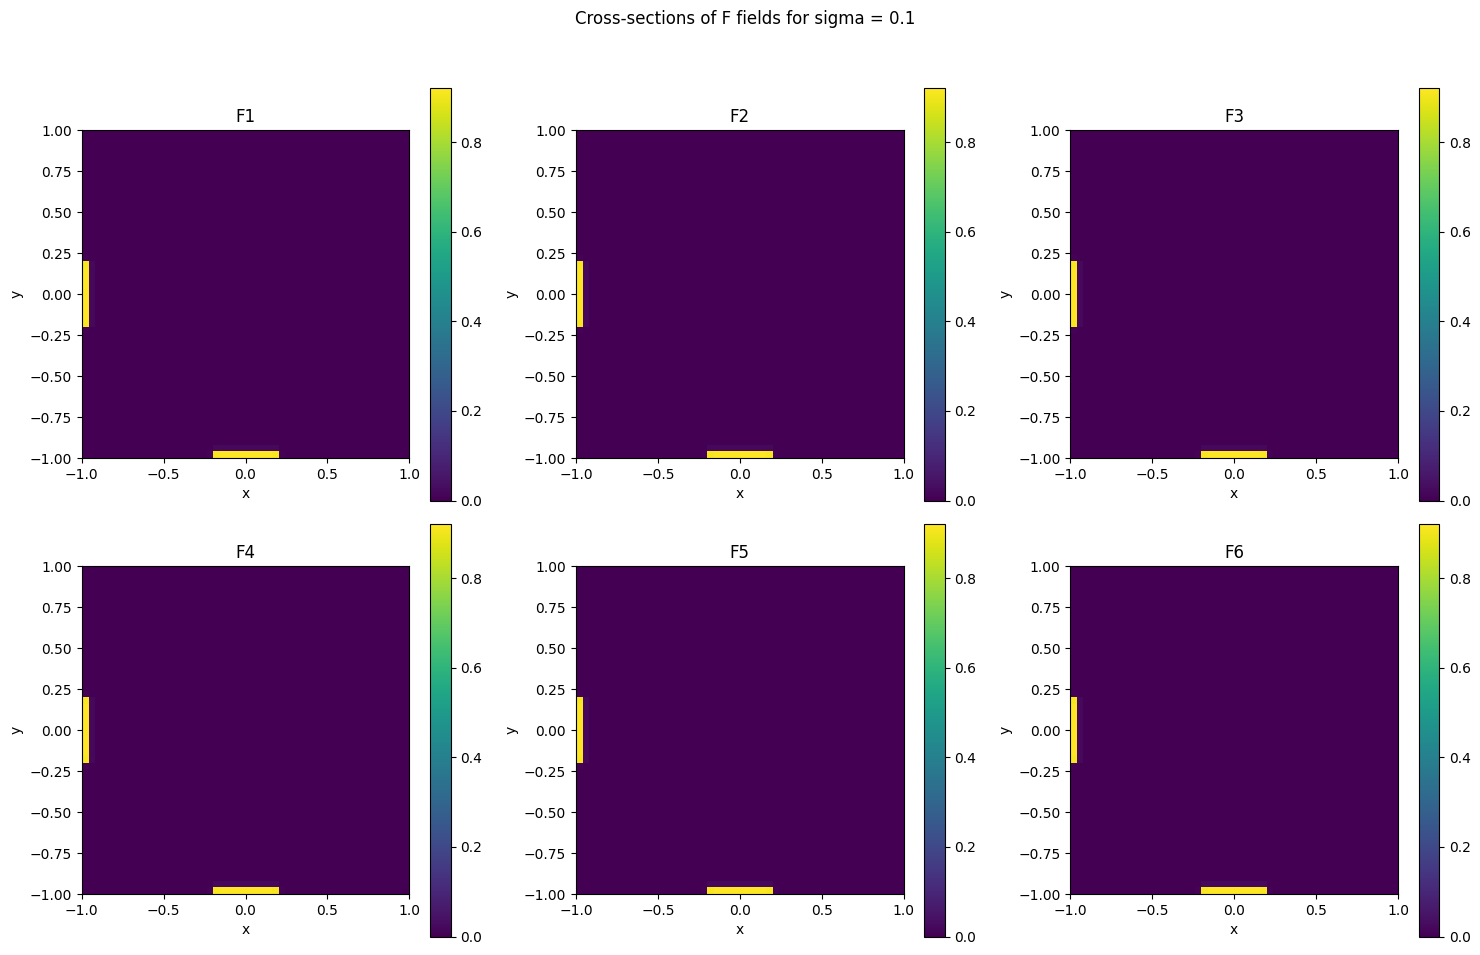

Converged after 14779 iterations.


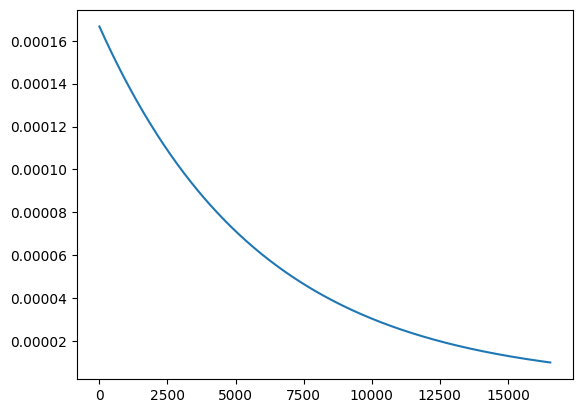

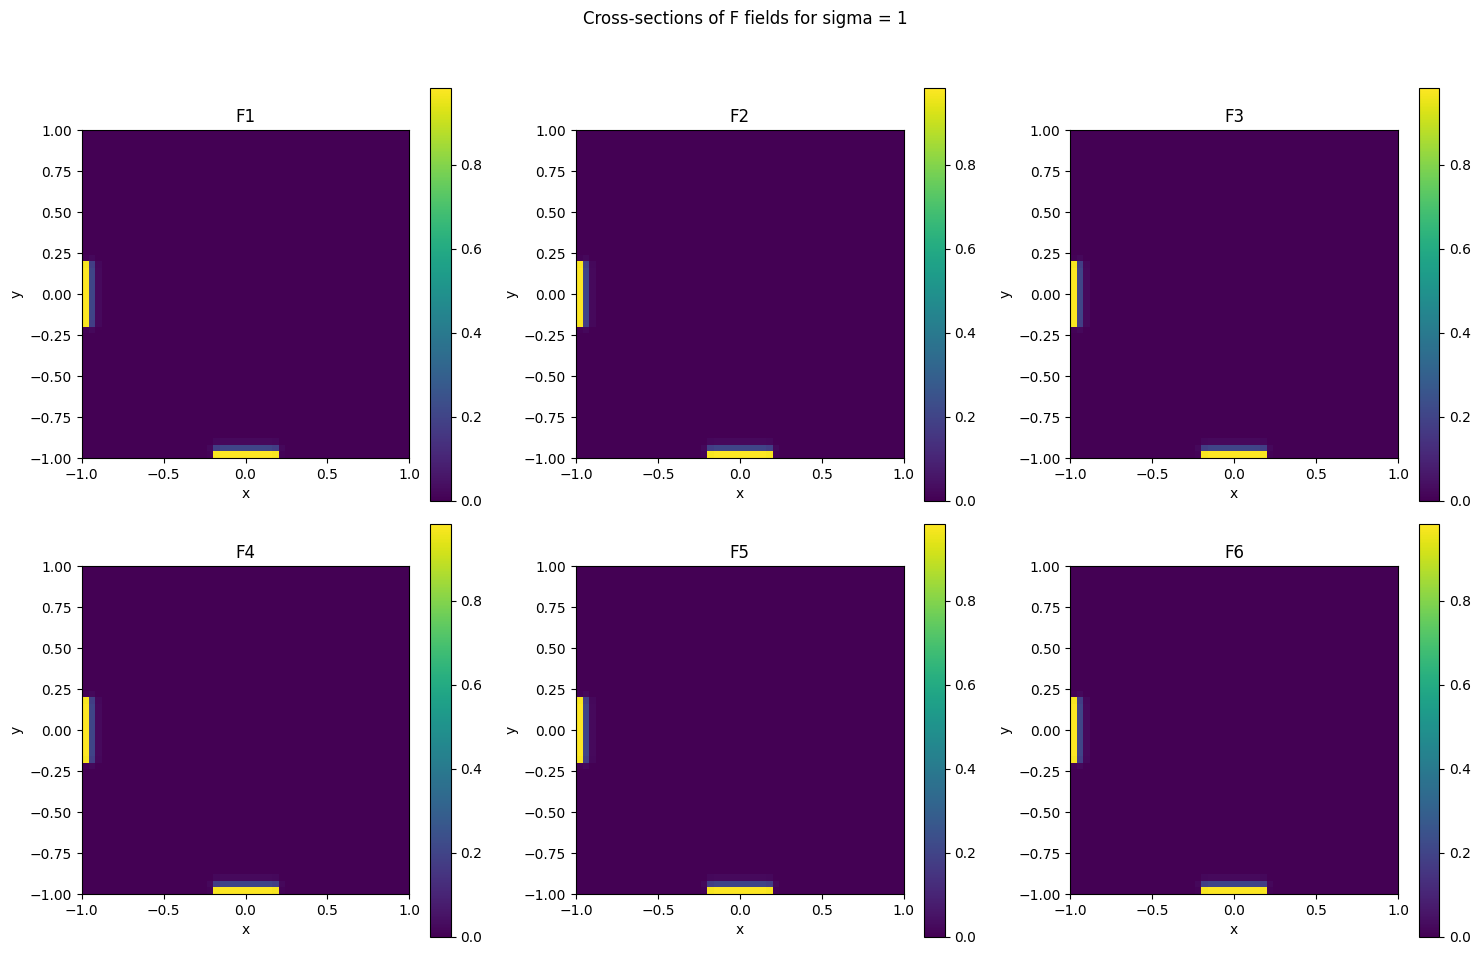

Converged after 18698 iterations.


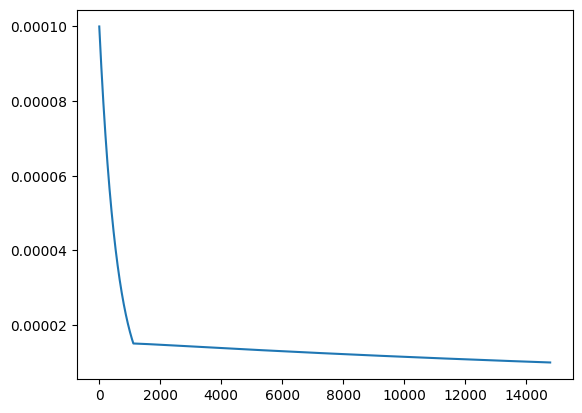

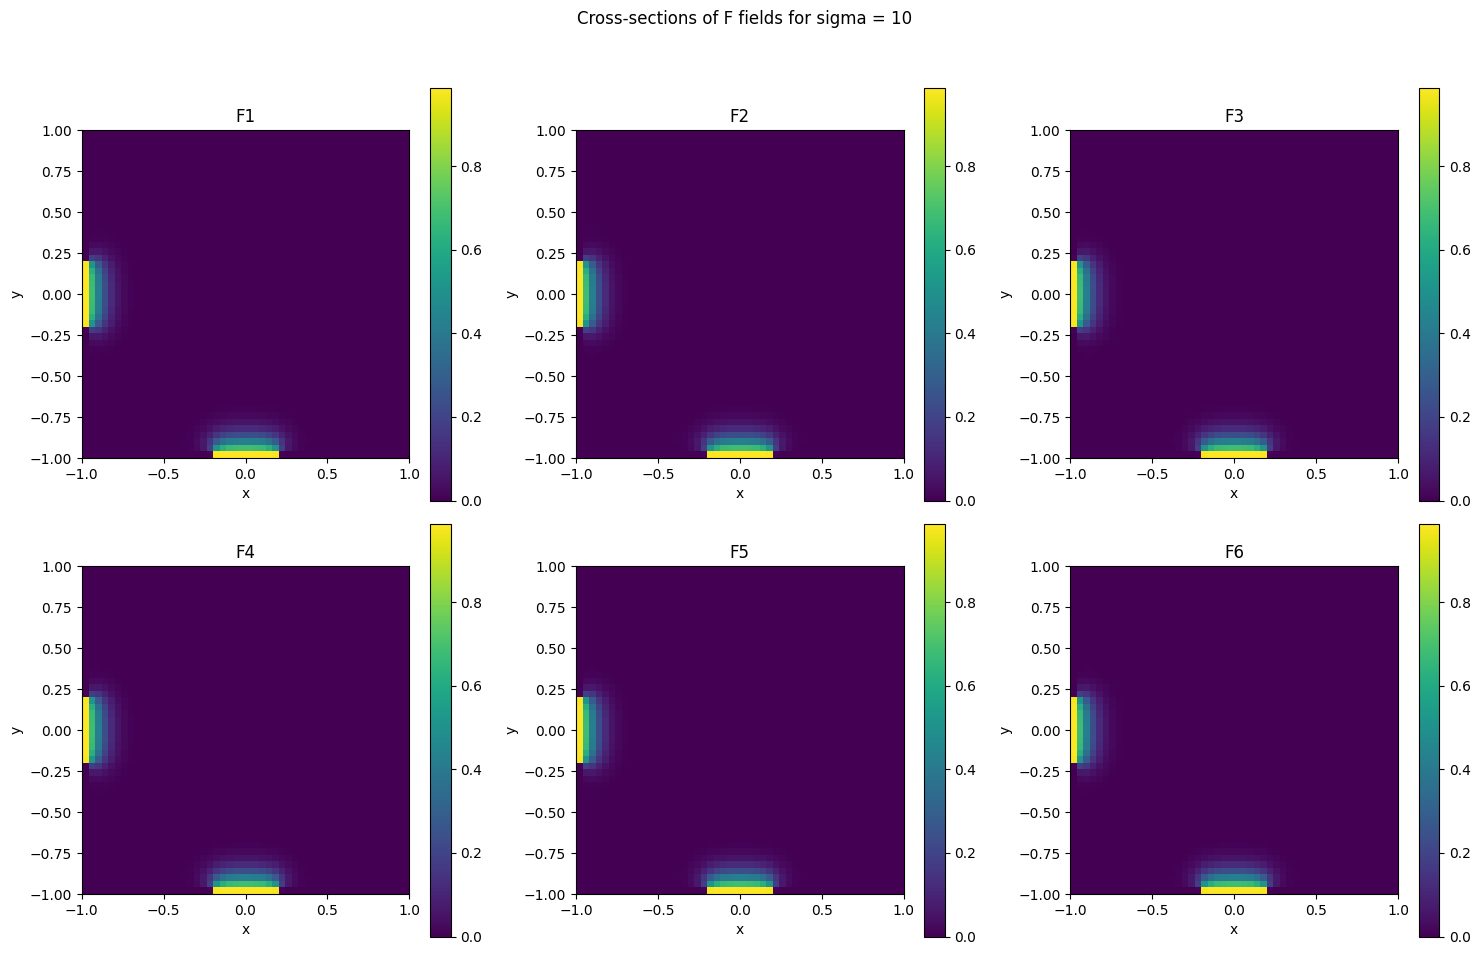

Converged after 7364 iterations.


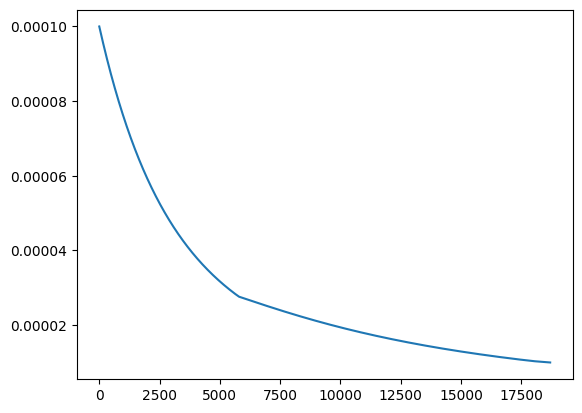

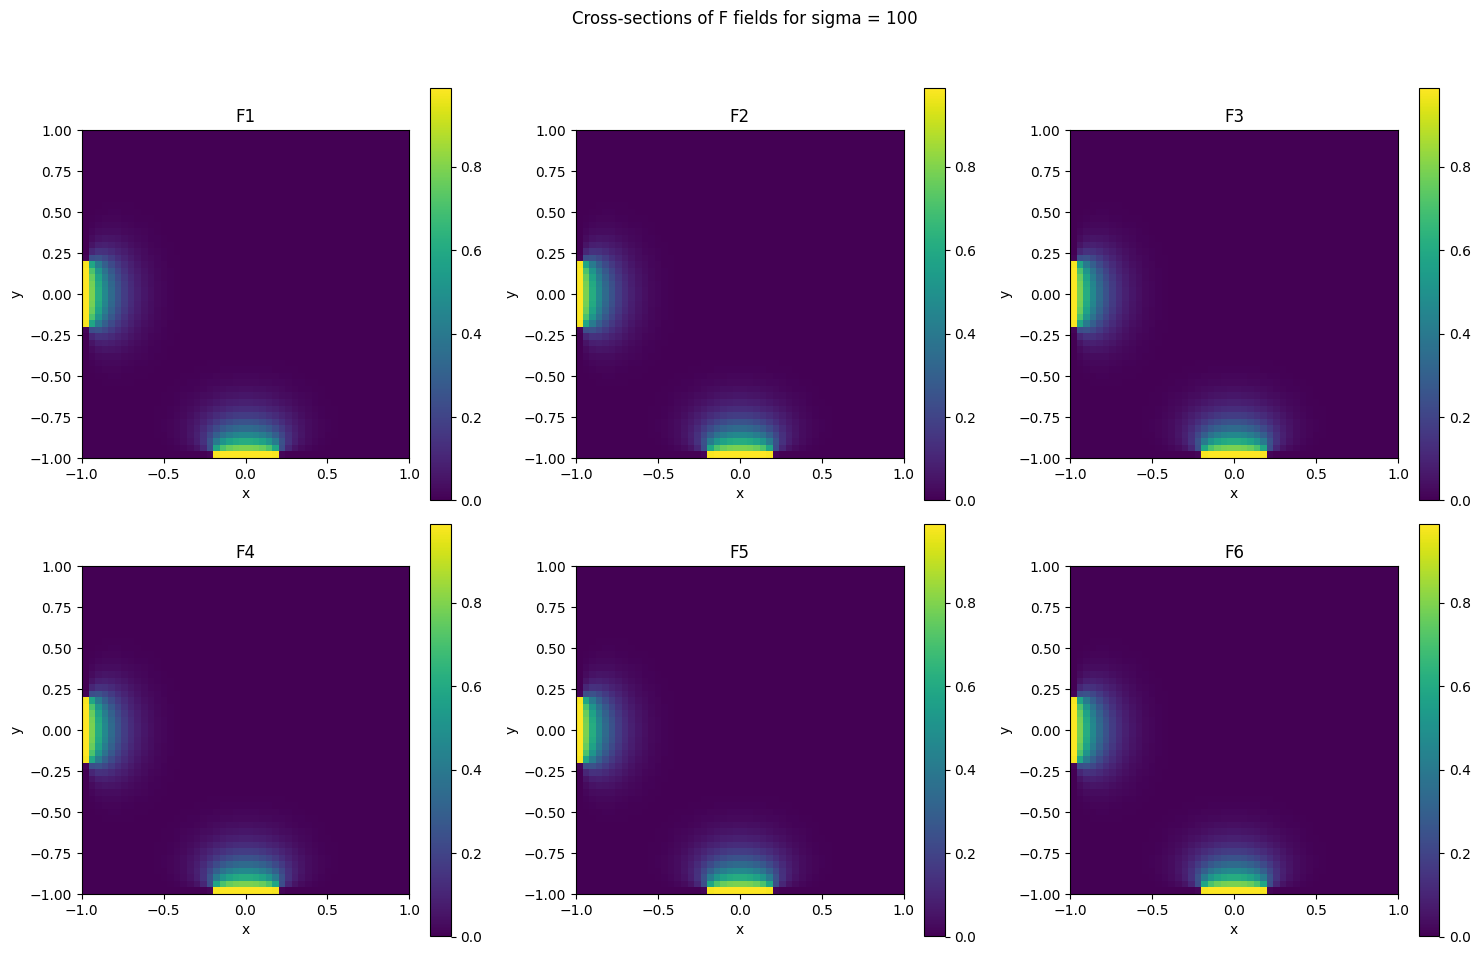

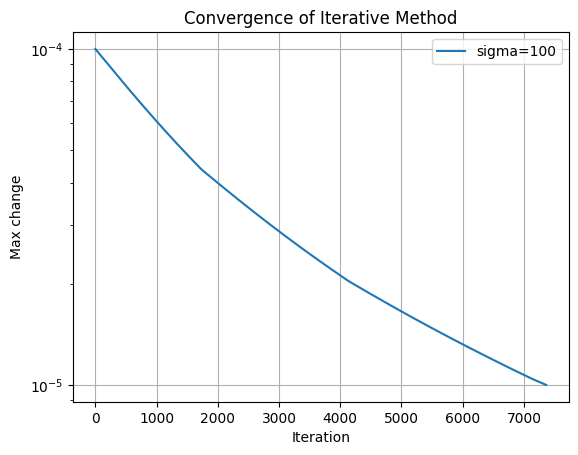

In [17]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
sigma_values = [0.1, 1, 10, 100]
N = 50  # Grid points in each dimension
dx = 2 / (N - 1)
dt = 0.01  # Time step
max_iter = 100000  # Maximum number of iterations
tolerance = 1e-5  # Convergence tolerance

# Spatial domain
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
z = np.linspace(-1, 1, N)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")


# Boundary condition function
def F_b(p, q):
    return np.where((abs(p) <= 0.2) & (abs(q) <= 0.2), 1, 0)


# Initialize Fi fields
F = np.zeros((6, N, N, N))

# Apply boundary conditions
F[0, 0, :, :] = F_b(Y[0, :, :], Z[0, :, :])  # F1 at x = -1
F[2, :, 0, :] = F_b(X[:, 0, :], Z[:, 0, :])  # F3 at y = -1
F[4, :, :, 0] = F_b(X[:, :, 0], Y[:, :, 0])  # F5 at z = -1
# F2, F4, F6 at their respective boundaries are already set to 0 by initialization

# Discretization of the Laplacian operator using finite differences
kernel = np.array(
    [
        [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
        [[0, 1, 0], [1, -6, 1], [0, 1, 0]],
        [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
    ]
)


def plot_cross_sections(F, sigma):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    titles = ["F1", "F2", "F3", "F4", "F5", "F6"]
    center_index = N // 2  # Index of the center slice

    for i in range(6):
        ax = axs[i // 3, i % 3]
        if i in [0, 1]:  # F1 and F2 are best viewed in the y-z plane
            c = ax.imshow(
                F[i, center_index, :, :], extent=(-1, 1, -1, 1), origin="lower"
            )
        elif i in [2, 3]:  # F3 and F4 in the x-z plane
            c = ax.imshow(
                F[i, :, center_index, :], extent=(-1, 1, -1, 1), origin="lower"
            )
        else:  # F5 and F6 in the x-y plane
            c = ax.imshow(
                F[i, :, :, center_index], extent=(-1, 1, -1, 1), origin="lower"
            )
        fig.colorbar(c, ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    plt.suptitle(f"Cross-sections of F fields for sigma = {sigma}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def plot_surface_plots(F, sigma):
    fig, axs = plt.subplots(2, 3, subplot_kw={"projection": "3d"}, figsize=(18, 12))
    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    titles = ["F1", "F2", "F3", "F4", "F5", "F6"]
    center_index = N // 2  # Index of the center slice

    # Prepare meshgrid for surface plot
    xv, yv = np.meshgrid(x, y)

    for i in range(6):
        ax = axs[i // 3, i % 3]
        if i in [0, 1]:  # F1 and F2 are best viewed in the y-z plane
            # Use the center slice along the x-axis
            Z_surface = F[i, center_index, :, :]
            surf = ax.plot_surface(xv, yv, Z_surface, cmap="viridis")
        elif i in [2, 3]:  # F3 and F4 in the x-z plane
            # Use the center slice along the y-axis, need to adjust meshgrid accordingly
            xv, yv = np.meshgrid(x, z)
            Z_surface = F[i, :, center_index, :]
            surf = ax.plot_surface(xv, yv, Z_surface, cmap="viridis")
        else:  # F5 and F6 in the x-y plane
            # Use the center slice along the z-axis, adjust meshgrid back to x-y
            xv, yv = np.meshgrid(x, y)
            Z_surface = F[i, :, :, center_index]
            surf = ax.plot_surface(xv, yv, Z_surface, cmap="viridis")

        ax.set_title(titles[i])
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Values")
        fig.colorbar(
            surf, ax=ax, shrink=0.5, aspect=5
        )  # Add a color bar which maps values to colors.

    plt.suptitle(f"Surface plots of F fields for sigma = {sigma}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Iterative solver
def solve(sigma):
    global F
    changes = []
    for iteration in range(max_iter):
        F_old = F.copy()

        # Calculate the mean of Fi
        F_mean = np.mean(F, axis=0)

        # Update each Fi according to its equation
        for i in range(6):
            dF = convolve(F[i], kernel, mode="constant", cval=0) * dx**2
            F[i] += dt * sigma * (F_mean - F[i] + dF)

        # Enforce boundary conditions
        F[0, 0, :, :] = F_b(Y[0, :, :], Z[0, :, :])  # F1 at x = -1
        F[2, :, 0, :] = F_b(X[:, 0, :], Z[:, 0, :])  # F3 at y = -1
        F[4, :, :, 0] = F_b(X[:, :, 0], Y[:, :, 0])  # F5 at z = -1
        change = np.max(np.abs(F - F_old))
        changes.append(change)
        # Check for convergence
        if np.max(np.abs(F - F_old)) < tolerance:
            print(f"Converged after {iteration} iterations.")
            plot_surface_plots(F, sigma)  # Plot after convergence
            return changes
    else:
        print("Max iterations reached without convergence.")
        return changes


# Solve for each sigma
plt.figure(figsize=(10, 7))
for sigma in sigma_values:
    changes = solve(sigma)
    plt.plot(changes, label=f"sigma={sigma}")
plt.yscale("log")  # Log scale to better visualize convergence
plt.xlabel("Iteration")
plt.ylabel("Max change")
plt.title("Convergence of Iterative Method")
plt.legend()
plt.grid(True)
plt.show()